# Course 2 - Statistics Essential - Module4
## Investment Analysis Assignments - Spark Funds
### Objective:
    Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.
    
### Business and Data Understanding:
* Spark Funds wants to invest between 5 to 15 million USD per round of investment only in English-speaking countries because of the ease of communication

### Goals of data analysis:
* Investment type analysis
* Country analysis
* Sector analysis

## Checkpoints - Part 1
### Checkpoint 1: Data Cleaning 1
1. Load the companies and rounds data (provided on the previous page) into two data frames and name them companies and rounds2 respectively.

In [1]:
import pandas as pd # Import Pandas Library
import matplotlib.pyplot as plt # Import Matlab Library
import seaborn as sb # Import seaborn library
# Read Companies and round2 data file and created data frame companies and rounds2
companies=pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/d934844e-5182-4b58-b896-4ba2a499aa57/companies.txt',encoding='ISO-8859-1',sep='\t')
rounds2=pd.read_csv('rounds2.csv',encoding='ISO-8859-1')
companies.shape
companies.info()
rounds2.shape
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB

In [2]:
# used head() to display top rows of the company dataframe (By default 5 frames - Here used 1 rows to display)
companies.head(1)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN


In [3]:
# used head() to display top rows of the company dataframe (By default 5 frames - Here used 1 rows to display)
rounds2.head(1)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0


### Results Expected: Table 1.1 - Understand the Data Set 
1. How many unique companies are present in rounds2? -----> Answer : 66370

In [4]:
# Converting all the uppercase charecter in to lower case charecter - Join works as case sensitive i.e. same company name in different case will be considered as different
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()
#rounds2['company_permalink']=rounds2['company_permalink'].str.lower().nunique()
# Calculating the length of the unquie companies using len() and unique() functions in rounds2 to data frame
rounds2DataFrame_unique_companies=len(rounds2['company_permalink'].unique())
# Print the Final Output Value
print("{} unique companies are present in rounds2 data frame".format(rounds2DataFrame_unique_companies))

66370 unique companies are present in rounds2 data frame


### Results Expected: Table 1.1 - Understand the Data Set 
2. How many unique companies are present in companies? -----> Answer : 66368
3. In the companies data frame, which column can be used as the unique key for each company? Write the name of the column. -----> Answer : permalink

In [5]:
# Converting all the uppercase charecter in to lower case charecter - Join works as case sensitive i.e. same company name in different case will be considered as different
companies['permalink']=companies['permalink'].str.lower()
# Calculating the length of the unquie companies using len() and unique() functions in companies to data frame
companiesDataFrame_unique_companies=len(companies['permalink'].unique())
# Print the Final Output Value
print("{} unique companies are present in companies data frame".format(companiesDataFrame_unique_companies))

66368 unique companies are present in companies data frame


### Master Data Frame
Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame

In [6]:
# Merging two dataframes using merge() function and created new data frame named master_dataframe
master_frame=pd.merge(rounds2,companies,how='left',left_on='company_permalink',right_on='permalink')
master_frame.describe()
master_frame.info()
master_frame.shape
# Calculting length of the master data frame using len() function - It gives total number of rows in the master data frame
c = len(master_frame)
# Printing the output value
print ("{} observations are present in master_frame".format(c))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
permalink                  114942 non-null object
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB
114949 observations are present in ma

In [7]:
# used head() to display top rows of the company dataframe (By default 5 frames - Here used 7 rows to display)
master_frame.head(1)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN


### Results Expected: Table 1.1 - Understand the Data Set 
5. Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame? -----> Answer : 114949

### Poor quality of data can lead to confused decision making.Before Moving to next step - Cleaning the data 
* Removing the unused or unrelated column from master data frame
* Removing NaN Values in the related columns

In [8]:
# Using drop() function remove unrelated column
master_frame=master_frame.drop(['funding_round_code', 'funding_round_code', 'funded_at','permalink', 'homepage_url',
                                 'status', 'state_code', 'region', 'city','founded_at'], axis=1)

In [9]:
master_frame.isna().mean(axis=0).round(1)#Checking null values from maester frame using mean

company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
raised_amount_usd          0.2
name                       0.0
category_list              0.0
country_code               0.1
dtype: float64

In [10]:
master_frame.isna().sum(axis=0)#Checking null values from maester frame using sum

company_permalink              0
funding_round_permalink        0
funding_round_type             0
raised_amount_usd          19990
name                           8
category_list               3414
country_code                8678
dtype: int64

In [11]:
# remove null values from company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
master_frame=master_frame[~(master_frame['company_permalink'].isnull()|master_frame['funding_round_type'].isnull()|master_frame['raised_amount_usd'].isnull()|master_frame['name'].isnull()|master_frame['category_list'].isnull()|master_frame['country_code'].isnull())]
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,IND
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0,0-6.com,Curated Web,CHN
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,41250.0,01Games Technology,Games,HKG
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,CAN


In [12]:
master_frame.isna().mean(axis=0).round(1)#Checking null values in maester frame using mean

company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
raised_amount_usd          0.0
name                       0.0
category_list              0.0
country_code               0.0
dtype: float64

In [13]:
master_frame.isna().sum(axis=0)#Checking number of null values in maester frame using sum

company_permalink          0
funding_round_permalink    0
funding_round_type         0
raised_amount_usd          0
name                       0
category_list              0
country_code               0
dtype: int64

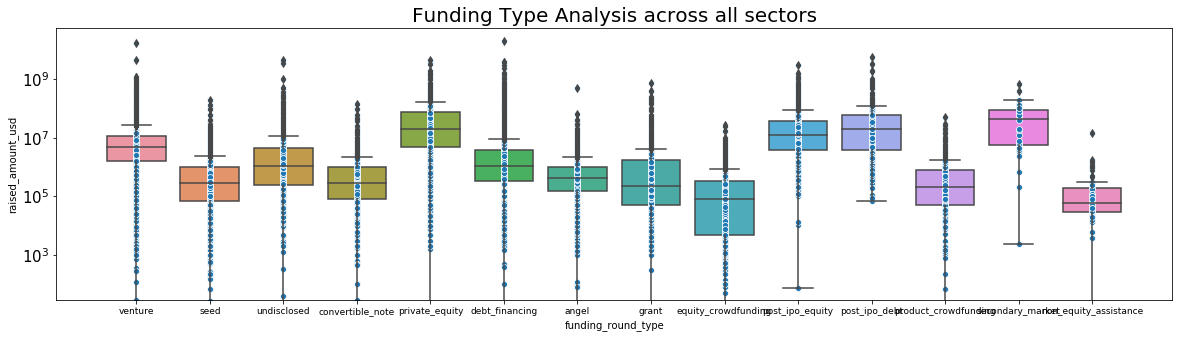

In [14]:
plt.figure(figsize=(20, 5))
plt.rc('xtick', labelsize=9) 
plt.rc('ytick', labelsize=15) 
sb.boxplot(x='funding_round_type',y='raised_amount_usd',data=master_frame)
sb.scatterplot(x='funding_round_type',y='raised_amount_usd',data=master_frame)
plt.title('Funding Type Analysis across all sectors', fontsize=20)
plt.yscale('log')
plt.show()

## Checkpoints - Part 1
### Checkpoint 2: Funding Type Analysis
* Spark Funds wants to choose one of these four investment types for each potential investment they will make.
    * venture
    * angel
    * seed
    * private equity

In [15]:
# Filter only venture,angel,seed and private equity funding round type.
master_frame=master_frame[(master_frame['funding_round_type']=='venture')|(master_frame['funding_round_type']=='angel')|(master_frame['funding_round_type']=='seed')|(master_frame['funding_round_type']=='private_equity')]
master_frame.head(1)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,IND


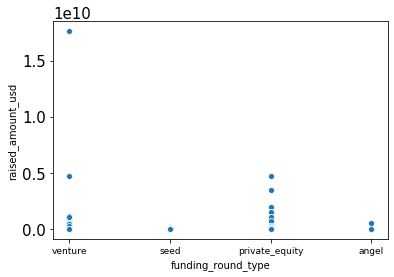

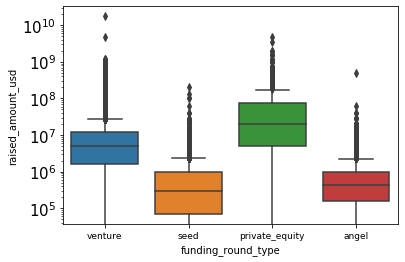

In [16]:
sb.scatterplot(x='funding_round_type',y='raised_amount_usd',data=master_frame)
plt.show()
sb.boxplot(x='funding_round_type',y='raised_amount_usd',data=master_frame)
plt.yscale('log')
plt.show()

### Results Expected: Table 2.1
    1. Average funding amount of angel type          -----> Answer :  1.0 million USD
    2. Average funding amount of private_equity type -----> Answer : 73.3 million USD
    3. Average funding amount of seed type           -----> Answer :  0.75 million USD
    4. Average funding amount of venture type        -----> Answer : 11.72 million USD
    4. Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?          -----> Answer : venture

In [17]:
# As per the scatter plot,assuming outlier are very minimal and only present in the venture funding type.
#Proceeding without removing outliers
# To Calculate average of funding ammounts converting dollars to million dollars
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd']/1000000
# Calculate Average Value using mean() and grouping based on the funding round type value
round(master_frame.groupby('funding_round_type').raised_amount_usd.mean(), 2)

funding_round_type
angel              0.97
private_equity    73.94
seed               0.75
venture           11.72
Name: raised_amount_usd, dtype: float64

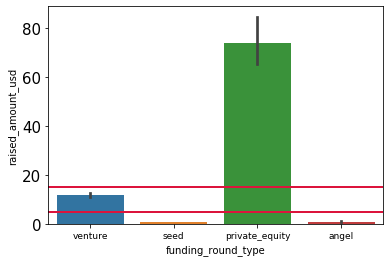

In [18]:
# Plot Funding Type Analysis
sb.barplot(x='funding_round_type',y='raised_amount_usd',data=master_frame)
plt.axhline(y=5,linewidth=2,color ='crimson')
plt.axhline(y=15,linewidth=2,color='crimson')
plt.show()

## Checkpoints - Part 2
### Checkpoint 3: Country Analysis
Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.

In [19]:
# Calculating sum of raised amount usd based on group by country code
Sum_raise_amount=master_frame.groupby('country_code').raised_amount_usd.sum()
# Sorting Values - Decending order
Sum_decendingValue=Sum_raise_amount.sort_values(ascending=False)
# top9 Data frame to display top nine countries which have received the highest total funding
top9 = pd.DataFrame(Sum_decendingValue)
top9.head(9)

,raised_amount_usd
country_code,
USA,508473.909940
CHN,61000.915923
GBR,26899.805686
IND,21049.113815
CAN,13168.914172
DEU,8580.103249
ISR,8101.823269
FRA,8078.613828
NLD,5058.483750


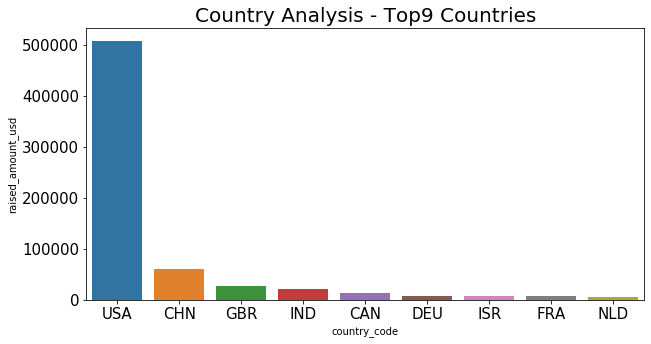

In [20]:
#Plot Top 9 Countries - Country Analysis
top9=top9.head(9)
plt.figure(figsize=(10, 5))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.title('Country Analysis - Top9 Countries', fontsize=20)
sb.barplot(top9 .index, top9.raised_amount_usd)
plt.show()

In [21]:
# Web scraping to get the Englis official speaking countries
import requests
from bs4 import BeautifulSoup
Wiki_url = requests.get('https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language')
#Reading html content of Wikipedia Page
html = BeautifulSoup(Wiki_url.text, 'lxml')
print(html.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of territorial entities where English is an official language - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_territorial_entities_where_English_is_an_official_language","wgTitle":"List of territorial entities where English is an official language","wgCurRevisionId":921620892,"wgRevisionId":921620892,"wgArticleId":750096,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: archived copy as title","CS1 Dutch-language sources (nl)","All articles with dead external links","Articles with dead external links from September 2018","Articles with permanently dead external links","Webarchive template wayback links","Wikipedia articles needing clarification from June 2017",

In [22]:
Class = html.find('table',{'class':'wikitable sortable'})
Class

<table class="wikitable sortable">
<caption>Countries where English is a <i><a href="/wiki/De_facto" title="De facto">de facto</a></i> official language
</caption>
<tbody><tr>
<th>Nr
</th>
<th>Country
</th>
<th>Region
</th>
<th><a class="mw-redirect" href="/wiki/List_of_countries_by_population" title="List of countries by population">Population</a>
</th>
<th>Primary language?
</th></tr>
<tr>
<td>1</td>
<td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="640" data-file-width="1280" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/88/Flag_of_Australia_%28converted%29.svg/23px-Flag_of_Australia_%28converted%29.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/88/Flag_of_Australia_%28converted%29.svg/35px-Flag_of_Australia_%28converted%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/88/Flag_of_Australia_%28converted%29.svg/46px-Flag_of_Australia_%28converted%29.svg.png 2x" width="23"/> </span><a hr

In [23]:
Findind_links = Class.findAll('a')
Findind_links

[<a href="/wiki/De_facto" title="De facto">de facto</a>,
 <a class="mw-redirect" href="/wiki/List_of_countries_by_population" title="List of countries by population">Population</a>,
 <a href="/wiki/Australia" title="Australia">Australia</a>,
 <a href="/wiki/New_Zealand" title="New Zealand">New Zealand</a>,
 <a href="#cite_note-1">[1]</a>,
 <a href="/wiki/United_Kingdom" title="United Kingdom">United Kingdom</a>,
 <a href="/wiki/United_States" title="United States">United States</a>]

In [24]:
Countries = []
for link in Findind_links:
    Countries.append(link.get('title'))
print(Countries)

['De facto', 'List of countries by population', 'Australia', 'New Zealand', None, 'United Kingdom', 'United States']


## Identify the top three English-speaking countries in the data frame top9.
### Results Expected: Table 3.1: Analysing the Top 3 English-Speaking Countries

     1. Top English-speaking country     -----> Answer : USA (United States Of America)        
     2. Second English-speaking country  -----> Answer : GBR (Great Britain)
     3. Third English-speaking country   -----> Answer : IND (India)

Note : CHN (China) is not considered.Official Language is not English

In [25]:
# Filtering master data frame only with Top 3 English-Speaking Countries (USA,GBR,IND)
master_frame = master_frame[(master_frame['country_code']=='USA')|(master_frame['country_code']=='GBR')|(master_frame['country_code']=='IND')]
master_frame.head(1)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10.0,#fame,Media,IND


## Checkpoints - Part 2
### Checkpoint 4: Sector Analysis 1
* Extract the primary sector of each category list from the category_list column
* Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [26]:
#Using split function taking out the first string before the vertical line to find primary sector in category list column
#After splitting the final results stored in the same category_list master frame column
master_frame['category_list']=master_frame['category_list'].apply(lambda x:x.split('|')[0])

In [27]:
# Read mappings data file and created data frame named mapping and replacing 0 with na to make more accurate calculation
mapping=pd.read_csv('mapping.csv',encoding='ISO-8859-1')
mapping.category_list = mapping.category_list.replace({'0':'na', '2.na' :'2.0'}, regex=True)
mapping.head(1)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0


In [28]:
#Merge mappings with Maindataframe  - using melt() function to massage a DataFrame into a format where one or more columns are identifier variables, while all other columns, considered measured variables, are unpivoted to the row axis, leaving just two non-identifier columns, variable and value.
mapping=pd.melt(mapping, id_vars=['category_list'],value_vars=['Automotive & Sports','Blanks','Cleantech / Semiconductors','Entertainment','Health','Manufacturing','News, Search and Messaging','Others','Social, Finance, Analytics, Advertising']) 
mapping.info()
mapping.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6192 entries, 0 to 6191
Data columns (total 3 columns):
category_list    6183 non-null object
variable         6192 non-null object
value            6192 non-null int64
dtypes: int64(1), object(2)
memory usage: 145.2+ KB


(6192, 3)

In [29]:
# dropping the values to get better data
mapping=mapping[~(mapping.value==0)]
mapping=mapping.drop('value',axis=1)
mapping.head(1)

,category_list,variable
8,Adventure Travel,Automotive & Sports


In [30]:
#we refer to one of the eight main sectors (named main_sector) listed in the mapping file
#Chaning the column name variable in to main_sector to make more readble as mentioned in the assignment
mapping=mapping.rename(columns={"variable":"main_sector"})
mapping.head(1)

,category_list,main_sector
8,Adventure Travel,Automotive & Sports


### Checkpoint 4: Sector Analysis 1
#### Expected Results: 
Code for a merged data frame with each primary sector mapped to its main sector (the primary sector should be present in a separate column)

In [31]:
# As part of funding analysis  - Finalized funding_round_type as venture type.
#Filtering the funding_round_type value as venture type
master_frame=master_frame[master_frame['funding_round_type']=='venture']
master_frame.head(1)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10.0,#fame,Media,IND


In [32]:
# All the funding_round_type column values become venture. 
#Dropping of the same column from master data frame using drop() function
master_frame = master_frame.drop(['funding_round_type'], axis = 1)
master_frame.head(1)

,company_permalink,funding_round_permalink,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,10.0,#fame,Media,IND


In [33]:
#Merging Mapping data frame with Master frame
master_frame=master_frame.merge(mapping,how='left',on ='category_list')
master_frame.head(1)

,company_permalink,funding_round_permalink,raised_amount_usd,name,category_list,country_code,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,10.0,#fame,Media,IND,Entertainment


## Checkpoints - Part 2
### Checkpoint 5: Sector Analysis 2

#### Result Expected : Three data frames D1, D2 and D3 

In [34]:
# Data frames D1, D2 and D3 for each of the three countries(USA,GBR,IND) containing the observations of funding type falling within the 5-15 million USD range
D1=master_frame[(master_frame['country_code']=='USA')&(master_frame['raised_amount_usd']<=15)&(master_frame['raised_amount_usd']>=5)]
D2=master_frame[(master_frame['country_code']=='GBR')&(master_frame['raised_amount_usd']<=15)&(master_frame['raised_amount_usd']>=5)]
D3=master_frame[(master_frame['country_code']=='IND')&(master_frame['raised_amount_usd']<=15)&(master_frame['raised_amount_usd']>=5)]

In [35]:
#The total number (or count) of investments for each main sector in a separate column for each dataframe D1,D2,D3
#The total amount invested in each main sector in a separate column for each dataframe D1,D2,D3
Grouping_D1=D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum','count']).rename(columns={'sum':'TotalAmountInvested','count':'TotalNumber-or count'})
Grouping_D2=D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum','count']).rename(columns={'sum':'TotalAmountInvested','count':'TotalNumber-or count'})
Grouping_D3=D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum','count']).rename(columns={'sum':'TotalAmountInvested','count':'TotalNumber-or count'})

In [36]:
# Merged D1,D2,D3 with Grouping_D1,Grouping_D2,Grouping_D3
D1=D1.merge(Grouping_D1,how='left',on='main_sector')
D2=D2.merge(Grouping_D2,how='left',on='main_sector')
D3=D3.merge(Grouping_D3,how='left',on='main_sector')

C:\Users\Bavani_Ennares_Mania\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [37]:
# Dataframe D1
D1.head(1)

,company_permalink,funding_round_permalink,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, TotalAmountInvested)","(raised_amount_usd, TotalNumber-or count)"
0,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,8.9,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising",23807.376964,2714.0


In [38]:
# Dataframe D2
D2.head(1)

,company_permalink,funding_round_permalink,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, TotalAmountInvested)","(raised_amount_usd, TotalNumber-or count)"
0,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,5.5,365Scores,Android,GBR,"Social, Finance, Analytics, Advertising",1089.404014,133.0


In [39]:
# Dataframe D3
D3.head(1)

,company_permalink,funding_round_permalink,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, TotalAmountInvested)","(raised_amount_usd, TotalNumber-or count)"
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,10.0,#fame,Media,IND,Entertainment,280.83,33


In [40]:
print("{}{}{}".format(Grouping_D1,Grouping_D2,Grouping_D3))

                                          raised_amount_usd  \
                                        TotalAmountInvested   
main_sector                                                   
Automotive & Sports                             1454.104361   
Cleantech / Semiconductors                     21206.628192   
Entertainment                                   5099.197982   
Health                                          8211.859357   
Manufacturing                                   7258.553378   
News, Search and Messaging                     13959.567428   
Others                                         26321.007002   
Social, Finance, Analytics, Advertising        23807.376964   

                                                              
                                        TotalNumber-or count  
main_sector                                                   
Automotive & Sports                                      167  
Cleantech / Semiconductors                            

### Results Expected: Table 5.1 : Sector-wise Investment Analysis
Sl.no |Questions | C1 | C2 | C3 
--- | --- | --- | --- | ---  
1 | Total number of Investments (count) | 12064 | 621 | 328
2 | Total amount of investment (USD) | 107766.58422299998 | 5379.078691000001 | 2949.5436019999997
3 | Top Sector name (no. of investment-wise) | Others | Others | Others
4 | Second Sector name (no. of investment-wise) | Social, Finance, Analytics, Advertising | Social, Finance, Analytics, Advertising | Social, Finance, Analytics, Advertising
5 | Third Sector name (no. of investment-wise) | Cleantech / Semiconductors | Cleantech / Semiconductors | News, Search and Messaging
6 | Number of investments in top sector (3) | 2950 | 147 | 110
7 | Number of investments in second sector (4) | 2714 | 133 | 60
8 | Number of investments in third sector (5) | 2300 | 128 | 52

In [41]:
# 1. Total number of investments (count)
print("Total number of investments(Count)-Country1(USA)----->",D1.raised_amount_usd.count())
print("Total number of investments(Count)-Country2(GBR)----->",D2.raised_amount_usd.count())
print("Total number of investments(Count)-Country3(IND)----->",D3.raised_amount_usd.count())
# 2. Total amount of investment (USD)
print("Total amount of investment (USD)-Country1(USA)------->",D1.raised_amount_usd.sum())
print("Total amount of investment (USD)-Country1(GBR)------->",D2.raised_amount_usd.sum())
print("Total amount of investment (USD)-Country1(IND)------->",D3.raised_amount_usd.sum())

Total number of investments(Count)-Country1(USA)-----> 12064
Total number of investments(Count)-Country2(GBR)-----> 621
Total number of investments(Count)-Country3(IND)-----> 328
Total amount of investment (USD)-Country1(USA)-------> 107766.58422299998
Total amount of investment (USD)-Country1(GBR)-------> 5379.078691000001
Total amount of investment (USD)-Country1(IND)-------> 2949.5436019999997


### Results Expected: Table 5.1 : Sector-wise Investment Analysis
Sl.no |Questions | C1 | C2 | C3 
--- | --- | --- | --- | ---  
9 | For point 3 (top sector count-wise), which company received the highest investment? | /organization/virtustream   | /organization/electric-cloud | /organization/firstcry-com  
10 | For point 4 (second best sector count-wise), which company received the highest investment? | /organization/shotspotter  | /organization/celltick-technologies  | /organization/shopclues-com 

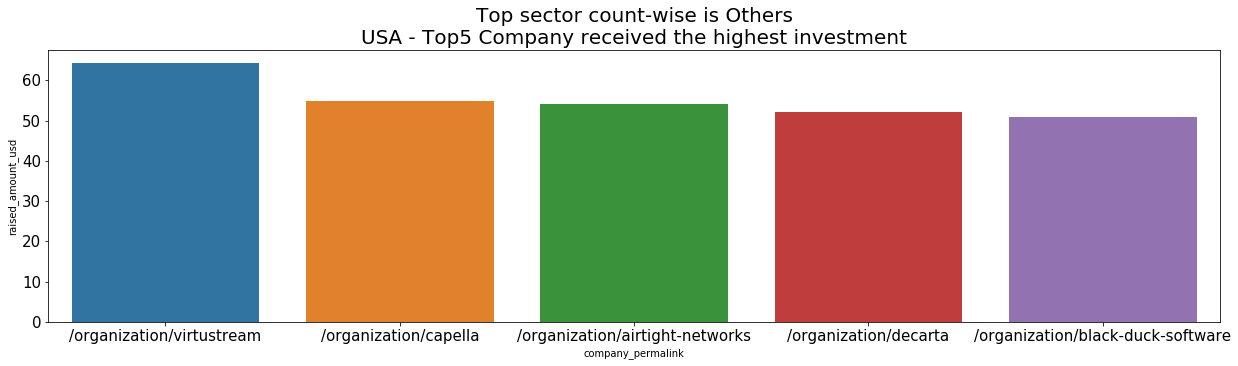

In [42]:
# USA Main Sector equal to Top sector 'Others'.Calculated Sum of usd and sorted in descending order
USA_Company_Others=D1[D1['main_sector']=='Others']
#USA_Company_Others=print(USA_Company_Others.pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc='sum').sort_values(by='raised_amount_usd',ascending=False).head(1))
USA_Company_Others=USA_Company_Others.pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc='sum').sort_values(by='raised_amount_usd',ascending=False)
USA_Company_Others=USA_Company_Others.head(5)
plt.figure(figsize=(21, 5))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.title('Top sector count-wise is Others\nUSA - Top5 Company received the highest investment', fontsize=20)
sb.barplot(USA_Company_Others.index, USA_Company_Others.raised_amount_usd)
plt.show()

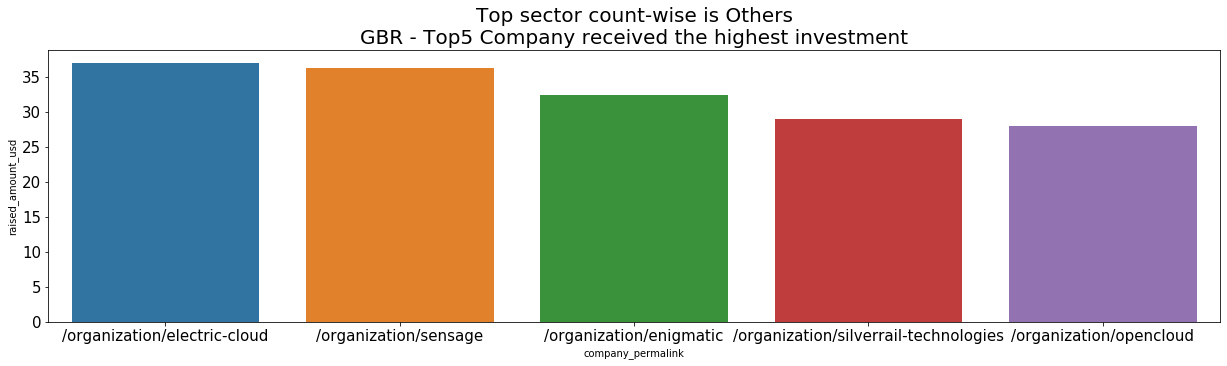

In [43]:
# GBR Main Sector equal to Top sector 'Others'.Calculated Sum of usd and sorted in descending order
GBR_Company_Others=D2[D2['main_sector']=='Others']
GBR_Company_Others=GBR_Company_Others.pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc='sum').sort_values(by='raised_amount_usd',ascending=False)
GBR_Company_Others=GBR_Company_Others.head(5)
plt.figure(figsize=(21, 5))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.title('Top sector count-wise is Others\nGBR - Top5 Company received the highest investment', fontsize=20)
sb.barplot(GBR_Company_Others.index, GBR_Company_Others.raised_amount_usd)
plt.show()

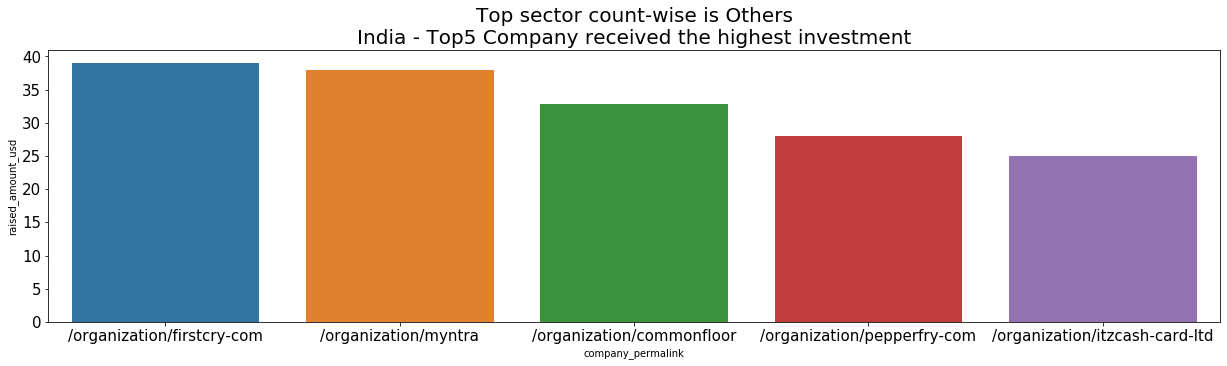

In [44]:
# IND Main Sector equal to Top sector 'Others'.Calculated Sum of usd and sorted in descending order
IND_Company_Others=D3[D3['main_sector']=='Others']
IND_Company_Others=IND_Company_Others.pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc='sum').sort_values(by='raised_amount_usd',ascending=False)
IND_Company_Others=IND_Company_Others.head(5)
plt.figure(figsize=(21, 5))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.title('Top sector count-wise is Others\nIndia - Top5 Company received the highest investment', fontsize=20)
sb.barplot(IND_Company_Others.index, IND_Company_Others.raised_amount_usd)
plt.show()

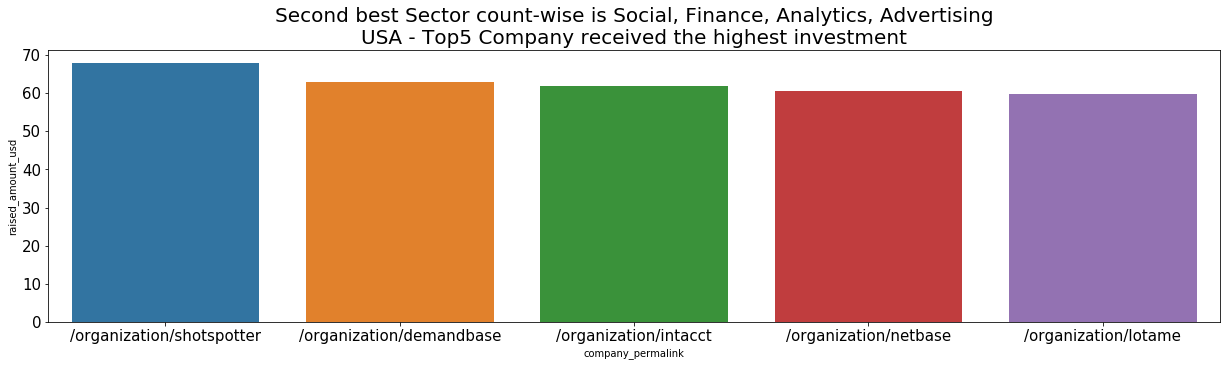

In [45]:
# USA Main Sector equal to Top sector 'Social, Finance, Analytics, Advertising'.Calculated Sum of usd and sorted in descending order
USA_Company_SFAA=D1[D1['main_sector']=='Social, Finance, Analytics, Advertising']
USA_Company_SFAA=USA_Company_SFAA.pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc='sum').sort_values(by='raised_amount_usd',ascending=False)
USA_Company_SFAA=USA_Company_SFAA.head(5)
plt.figure(figsize=(21, 5))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.title('Second best Sector count-wise is Social, Finance, Analytics, Advertising\nUSA - Top5 Company received the highest investment', fontsize=20)
sb.barplot(USA_Company_SFAA.index, USA_Company_SFAA.raised_amount_usd)
plt.show()

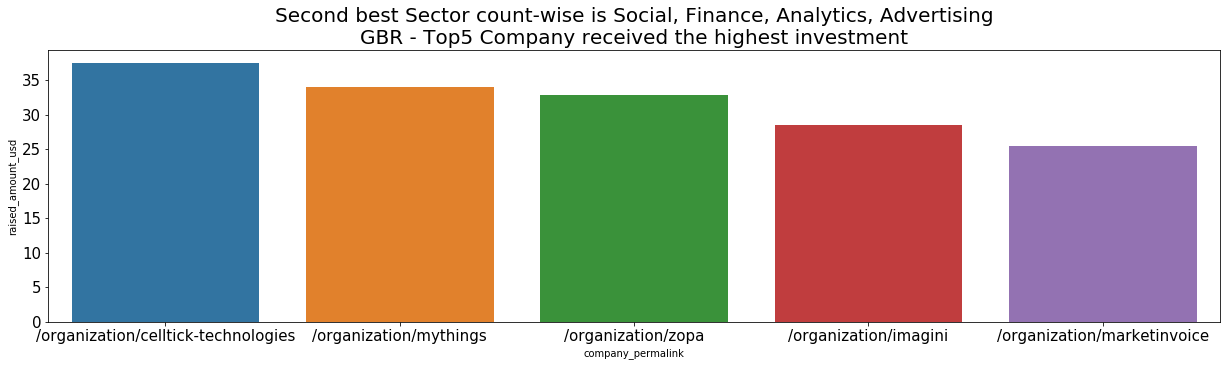

In [46]:
# GBR Main Sector equal to Top sector 'Social, Finance, Analytics, Advertising'.Calculated Sum of usd and sorted in descending order
GBR_Company_SFAA=D2[D2['main_sector']=='Social, Finance, Analytics, Advertising']
GBR_Company_SFAA=GBR_Company_SFAA.pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc='sum').sort_values(by='raised_amount_usd',ascending=False)
GBR_Company_SFAA=GBR_Company_SFAA.head(5)
plt.figure(figsize=(21, 5))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.title('Second best Sector count-wise is Social, Finance, Analytics, Advertising\nGBR - Top5 Company received the highest investment', fontsize=20)
sb.barplot(GBR_Company_SFAA.index, GBR_Company_SFAA.raised_amount_usd)
plt.show()

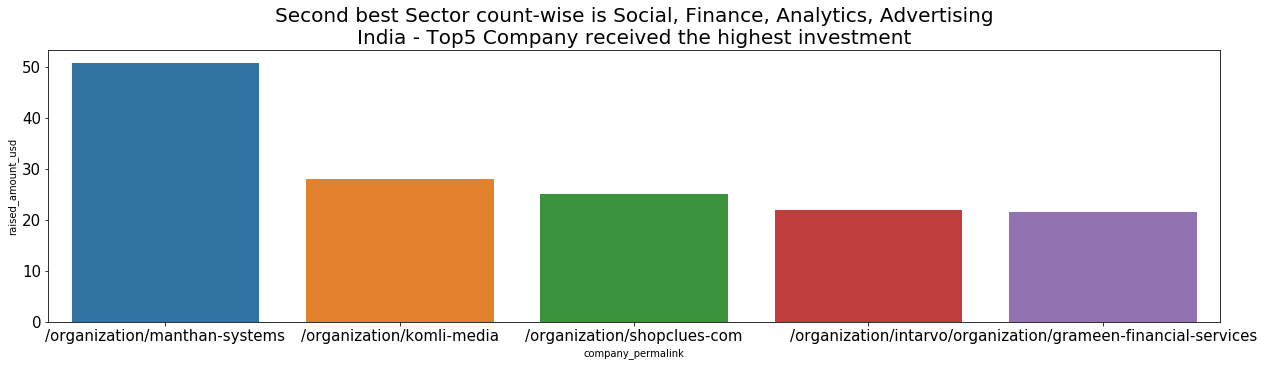

In [47]:
# IND Main Sector equal to Top sector 'Social, Finance, Analytics, Advertising'.Calculated Sum of usd and sorted in descending order
IND_Company_SFAA=D3[D3['main_sector']=='Social, Finance, Analytics, Advertising']
IND_Company_SFAA=IND_Company_SFAA.pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc='sum').sort_values(by='raised_amount_usd',ascending=False)
IND_Company_SFAA=IND_Company_SFAA.head(5)
plt.figure(figsize=(21, 5))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.title('Second best Sector count-wise is Social, Finance, Analytics, Advertising\nIndia - Top5 Company received the highest investment', fontsize=20)
sb.barplot(IND_Company_SFAA.index, IND_Company_SFAA.raised_amount_usd)
plt.show()